In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
words = open('/content/drive/MyDrive/Colab Notebooks/makemore/names (1).txt','r').read().splitlines()
len(words)

32033

In [9]:
#chars to int
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos={i:s for s,i in stoi.items()}

In [33]:
#how many characters to take for prediction of the next character

block_size = 3
X, Y =[], [] #x is input, y is label
for w in words:
  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    context = context[1:] + [ix]

X =torch.tensor(X)
Y =torch.tensor(Y)


In [103]:
def build_dataset(words):
  block_size = 3
  X, Y =[], [] #x is input, y is label
  for w in words:
    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  X =torch.tensor(X)
  Y =torch.tensor(Y)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [144]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10),generator=g)
#Weights, creating hidden layer
W1 = torch.randn((30,200),generator=g)
b1 = torch.randn(200,generator=g)
#torch.cat(torch.unbind(emb,1),1)
W2 = torch.randn((200,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1, b1, W2, b2]

In [145]:
for p in parameters:
  p.requires_grad = True

In [146]:
lre = torch.linspace(-3,0,100)
lrs = 10**lre

In [147]:
lri = []
lossi = []
stepi = []

In [174]:
for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

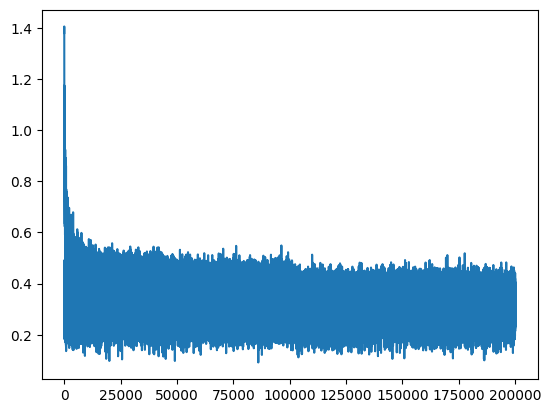

In [175]:
plt.plot(stepi,lossi)

In [176]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0677, grad_fn=<NllLossBackward0>)

In [177]:
#training split, validation split, test split
#80%, 10% , 10%
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 +b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1304, grad_fn=<NllLossBackward0>)

In [178]:
for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

calynn.
unazarilver.
ely.
revis.
evonten.
adilynn.
oloby.
zptin.
samuez.
chrine.
luia.
kiri.
evondralla.
ortajahzin.
egoira.
alitan.
devia.
vic.
meliaketanni.
sparte.
